# K-means clustering algorithms with numpy 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



data = pd.read_csv('Mall_Customers.csv')

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data["Gender"] = le.fit_transform(data["Gender"])

X_df= data.iloc[:,1:]

X_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X_df)



In [4]:
def init_centroids(X, k):

    m,n = X.shape[0], X.shape[1]
    centroids = np.zeros((k,n))
    
    for i in range(k):
        
    
        centroids[i] = X[np.random.randint(0,m+1),:]
        
    return centroids


In [5]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros((m,1))
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [6]:
def compute_centroids(X, idx, k):
    m, n = X.shape[0],X.shape[1]
    centroids = np.zeros((k, n))
    count = np.zeros((k,1))
    
    for i in range(m):
        index = int((idx[i])[0])
        centroids[index,:] += X[i,:]
        count[index]+=1
    
    return np.divide(centroids, count, out=np.zeros_like(centroids), where=count!=0)


In [7]:
"""
compute_centroids(X, idx, 3)"""

'\ncompute_centroids(X, idx, 3)'

In [8]:
def run_k_means(X, initial_centroids, iters_num):
    m, n = X.shape[0], X.shape[1]
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    error_z = np.zeros((iters_num,1))

    for i in range(iters_num):
        
        temp = centroids
        
        idx = find_closest_centroids(X, centroids)
        
        centroids = compute_centroids(X, idx, k)
        
        l = np.zeros((k,1))

        for j in range(k):
            dist = centroids[j, :] - temp[j, :]
            l[j] = np.sum(dist**2)
        error_z[i] = np.sum(l)
          
    return centroids, error_z, idx


In [9]:
"""
k = 4
initial_centroids = init_centroids(X, k)
centroids, z, idx = run_k_means(X, initial_centroids, 20)

for j in range(i):
    wcss = np.sum((X[np.where(idx == i-1)[0],:]-centroids[i-1])**2)
WCSS.append(wcss)
"""



 

'\nk = 4\ninitial_centroids = init_centroids(X, k)\ncentroids, z, idx = run_k_means(X, initial_centroids, 20)\n\nfor j in range(i):\n    wcss = np.sum((X[np.where(idx == i-1)[0],:]-centroids[i-1])**2)\nWCSS.append(wcss)\n'

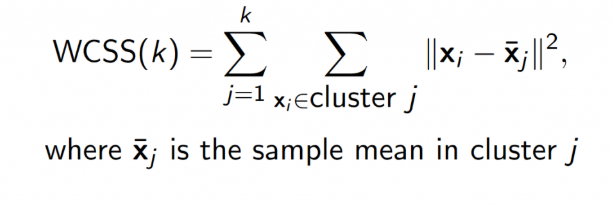

In [10]:
def find_k(k):
    
    WCSS = []
    for i in range(1,k+1):
        initial_centroids = init_centroids(X, i)
        
        centroids, z, idx = run_k_means(X, initial_centroids, 10)
        for j in range(i):
            wcss = np.sum((X[np.where(idx == i-1)[0],:]-centroids[i-1])**2)
        WCSS.append(wcss)
    return WCSS

WCSS = find_k(10)
WCSS

[800.0000000000001,
 322.8653249277678,
 184.36451065520424,
 71.12940411631448,
 50.717303611233774,
 70.6595862867627,
 27.17455729295527,
 13.721400713463757,
 39.06020433356374,
 19.01605662472518]

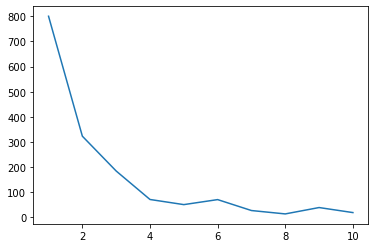

In [11]:
plt.plot(range(1,11),WCSS)

In [12]:
def visualiza(num_iters):
    for i in range(1,num_iters):
        

        ff, z, idx11 = run_k_means(X, initial_centroids, i)
        c1 = X[np.where(idx11 == 0)[0],:]
        c2 = X[np.where(idx11 == 1)[0],:]
        c3 = X[np.where(idx11 == 2)[0],:]
        c4 = X[np.where(idx11 == 3)[0],:]
        c5 = X[np.where(idx11 == 4)[0],:]
        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(c1[:,0], c1[:,1], s=20, color='r', label='Cluster 1')
        ax.scatter(c2[:,0], c2[:,1], s=20, color='g', label='Cluster 2')
        ax.scatter(c3[:,0], c3[:,1], s=20, color='b', label='Cluster 3')
        ax.scatter(c4[:,0], c4[:,1], s=20, color='y', label='Cluster 4')
        ax.scatter(c5[:,0], c5[:,1], s=20, color='k', label='Cluster 5')
        ax.legend()
        
    

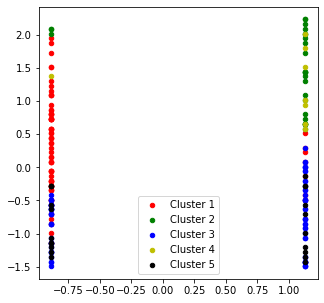

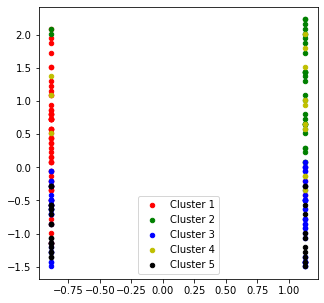

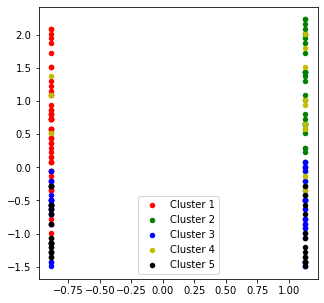

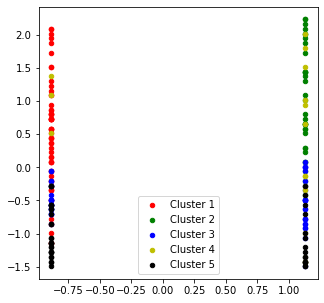

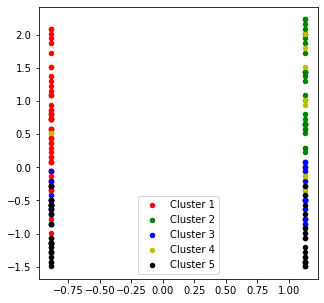

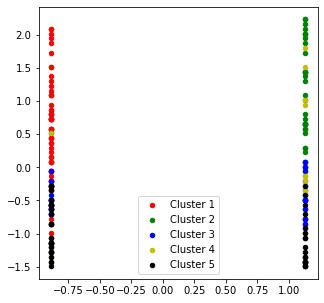

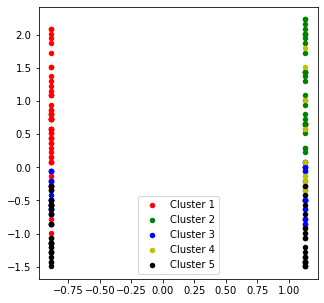

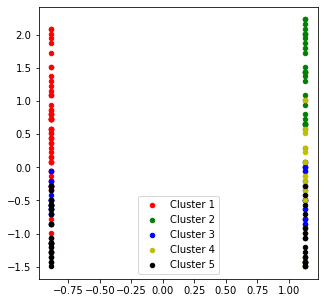

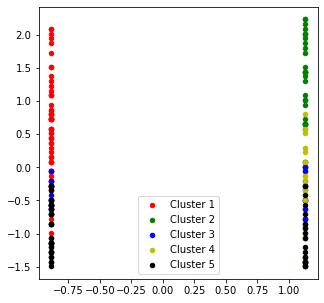

In [13]:
k=5

initial_centroids = init_centroids(X, k)
        

x = visualiza(10)
    

In [14]:

"""from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(X)

kmeans.labels_"""

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters = 4, init='k-means++')\nkmeans.fit(X)\n\nkmeans.labels_\n"

In [15]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score



def control_k(k):
    
    for i in range(2,k):
        initial_centroids = init_centroids(X, k)
        centroids, z, idx = run_k_means(X, initial_centroids, 10)
        idx1 = np.int_(idx.reshape(len(idx)))
        print(" for k = {1}, silhouette_score_: {0}".format(silhouette_score(X,idx1, metric='euclidean'),i))
 
        print('for k = {1}, Davies Bouldin Score: {0}'.format(davies_bouldin_score(X,idx1),i))
        
control_k(10)
 


 for k = 2, silhouette_score_: 0.38541399908750734
for k = 2, Davies Bouldin Score: 0.8818232067537949
 for k = 3, silhouette_score_: 0.37292233786913626
for k = 3, Davies Bouldin Score: 0.9971947449635143
 for k = 4, silhouette_score_: 0.3784913316073255
for k = 4, Davies Bouldin Score: 0.8879143823407232
 for k = 5, silhouette_score_: 0.377124997355394
for k = 5, Davies Bouldin Score: 0.8787693577618425
 for k = 6, silhouette_score_: 0.420342376994601
for k = 6, Davies Bouldin Score: 0.8337572775954563
 for k = 7, silhouette_score_: 0.3625215137611411
for k = 7, Davies Bouldin Score: 0.9119423980798361
 for k = 8, silhouette_score_: 0.3197625059766243
for k = 8, Davies Bouldin Score: 1.068368298492953
 for k = 9, silhouette_score_: 0.41136987640858363
for k = 9, Davies Bouldin Score: 0.8415227977886575


In [16]:

# map back clusters to dataframe
initial_centroids = init_centroids(X, 6)
centroids, z, idx = run_k_means(X, initial_centroids, 10)
frame = pd.DataFrame(X_df)
frame['cluster'] = idx
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,3.0
1,1,21,15,81,3.0
2,0,20,16,6,0.0
3,0,23,16,77,1.0
4,0,31,17,40,1.0


In [18]:
avg_df = X_df.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.000000,42.116667,56.250000,36.900000
1,1.0,0.000000,25.590909,33.954545,69.000000
2,2.0,0.461538,32.692308,86.538462,82.128205
3,3.0,1.000000,25.720000,40.400000,59.000000
4,4.0,0.826087,39.043478,90.608696,15.391304
5,5.0,0.838710,60.129032,49.064516,41.161290


<AxesSubplot:xlabel='cluster', ylabel='Gender'>

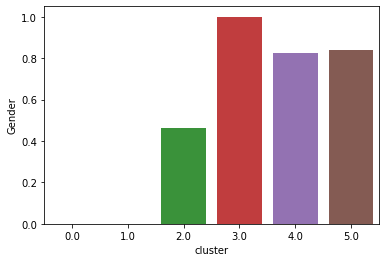

In [19]:

import seaborn as sns
sns.barplot(x='cluster',y='Gender',data=avg_df)


<AxesSubplot:xlabel='cluster', ylabel='Age'>

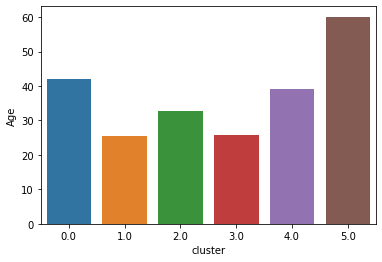

In [20]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

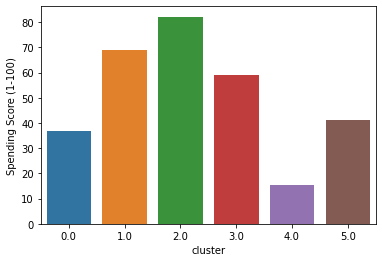

In [21]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

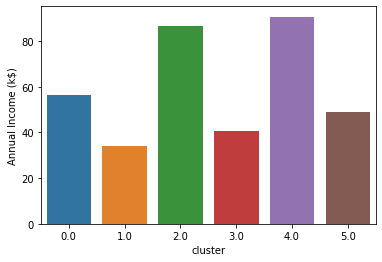

In [22]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)